In [1]:
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm

HW5-1 

实现k均值聚类算法

In [2]:
def k_means(image,k=2,iters=1000):
    m, n, z = image.shape
    new_image = np.reshape(image,(m*n,z))  # 排列成m*n行z列
    cluster = new_image[random.sample(range(m*n), k), :]  # 随机选三个聚类中心
    iter = 0
    tol = 1e-11  # 容忍度
    J_prev = float('inf')
    J = []
    while True:
        iter = iter + 1
        dist = np.dot(np.sum(new_image**2,axis=1).reshape((m*n,1)),np.ones((1,k))) + \
            np.dot(np.sum(cluster**2,axis=1).reshape((k,1)), np.ones((1, m*n))).T - 2*np.dot(new_image, cluster.T)
        label = np.argmin(dist,axis=1)
        for i in range(k):
            cluster[i,:] = np.mean(new_image[label==i,:], axis=0)  # 取新的k个聚类中心
        J_cur = np.sum((new_image - cluster[label,:])**2)
        J.append(J_cur)
        print('iteration:{0},object fucntion:{1}'.format(iter,J_cur))
        if np.abs(J_cur-J_prev) < tol:
            break
        if iter == 1000:
            break
        J_prev = J_cur
    return cluster[label,:].reshape((m,n,z))

In [8]:
# 计算直方图
def nD_histogram(data,dimension,nbins,pInMin,pInMax):
    pHistogram = []  # store histogram points
    pHsize = 1
    for idim in range(dimension):
        pHsize *= nbins[idim]
    for i in range(pHsize):
        pHistogram.append(0)
    pBinSpacings = []   # store bin width
    pBinPos = []   # store bin position
    for i in range(dimension):
        pBinSpacings.append(0)
        pBinPos.append(0)
    for idim in range(dimension): #store bin width of different dimensions
        pBinSpacings[idim] = (pInMax[idim] - pInMin[idim])/nbins[idim]
    for idata in range(len(data)):
        for idim in range(dimension):
            value = data[idata][idim]
            pBinPos[idim] = int((value - pInMin[idim])/pBinSpacings[idim])
            #防止越界
            pBinPos[idim] = max(pBinPos[idim],0)
            pBinPos[idim] = min(pBinPos[idim],nbins[idim] - 1)
        index = pBinPos[0]
        for idim in range(1,dimension):
            vSize = 1
            for i in range(idim):
                vSize *= nbins[i]
            index += pBinPos[idim] * vSize
        pHistogram[index] += 1
    return np.array(pHistogram)

In [97]:
def OTSU(imhist):
    L = imhist.shape[0]
    N = np.sum(imhist)
    standn = np.arange(L)
    mu_g = np.sum(standn*imhist)/N   #图片的全局像素平均值
    w_1 = 0
    m_1 = 0
    max_y = -float('inf')
    index = 0
    for i in range(L):  #组内至少有一个元素
        w_1 += imhist[i]/N   # Frequency
        m_1 += i*imhist[i]/N
        if w_1 == 0:
            y = 0
        elif w_1 == 1:
            break
        else:
            y = (mu_g * w_1 - m_1) ** 2 / (w_1 * (1 - w_1))
        if y > max_y:
            max_y = y
            index = i
    return index

In [141]:
def Add_SaltAndPepper_Nosie(img, p=0.1):
    """
    添加椒盐噪声
    :param img: 输入图片
    :param p: 噪声产生概率
    :return: 产生噪声的图片
    """
    L = 256
    # 添加盐噪声
    noise = np.random.uniform(0, L - 1, img.shape)
    mask = noise < p * (L - 1)
    img = img * (1 - mask)
    # 添加椒噪声
    mask = noise > (1 - p) * (L - 1)
    img = (L - 1) * mask + img * (1 - mask)
    return img

查看OSTU阈值处理结果

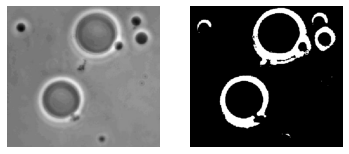

In [193]:
# 原图
im = Image.open('polymersomes.tif').convert('L')
im_ary = np.array(im, dtype='int32')
plt.subplot(121)
new_image = plt.imshow(im_ary,cmap='gray')
plt.axis("off")
# OSTU
m,n = im_ary.shape
N = m*n   #总像素个数
L = 256
imhist = nD_histogram(im_ary.reshape((N, 1)), 1, [L], [0], [L])  # 产生图片的直方图
T = OTSU(imhist)
im_ary[im_ary <= T] = 0
im_ary[im_ary > T] = 1
new_imarry = im_ary * (L - 1)
plt.subplot(122)
plt.imshow(new_imarry, cmap='gray')
plt.axis("off")
plt.savefig('./figs/fig1.png')

不同初始化下k-means结果

random seed 1:
iteration:1,object fucntion:52137451
iteration:2,object fucntion:48759315
iteration:3,object fucntion:48314580
iteration:4,object fucntion:48314580
random seed 2:
iteration:1,object fucntion:48150329
iteration:2,object fucntion:48150329
random seed 3:
iteration:1,object fucntion:59479540
iteration:2,object fucntion:58560592
iteration:3,object fucntion:58424137
iteration:4,object fucntion:58424137
random seed 4:
iteration:1,object fucntion:47707957
iteration:2,object fucntion:46752958
iteration:3,object fucntion:46453348
iteration:4,object fucntion:46372314
iteration:5,object fucntion:46372314
random seed 5:
iteration:1,object fucntion:49207343
iteration:2,object fucntion:47707957
iteration:3,object fucntion:46544293
iteration:4,object fucntion:46372314
iteration:5,object fucntion:46372314
random seed 6:
iteration:1,object fucntion:48273025
iteration:2,object fucntion:48314580
iteration:3,object fucntion:48314580


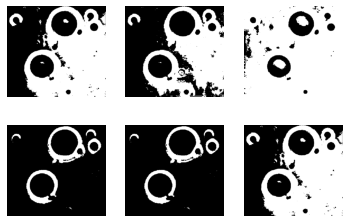

In [195]:
# 原图
im = Image.open('polymersomes.tif').convert('L')
im_ary = np.array(im, dtype='int32')
im_ary = np.expand_dims(im_ary,axis=2)
# k-means
print('random seed 1:')
random.seed(1)
new_ary = k_means(im_ary, k=2)
new_ary = np.squeeze(new_ary, axis=2)
plt.subplot(231)
plt.imshow(new_ary, cmap='gray')
plt.axis("off")

print('random seed 2:')
random.seed(2)
new_ary = k_means(im_ary, k=2)
new_ary = np.squeeze(new_ary, axis=2)
plt.subplot(232)
plt.imshow(new_ary, cmap='gray')
plt.axis("off")


print('random seed 3:')
random.seed(3)
new_ary = k_means(im_ary, k=2)
new_ary = np.squeeze(new_ary, axis=2)
plt.subplot(233)
plt.imshow(new_ary, cmap='gray')
plt.axis("off")


print('random seed 4:')
random.seed(4)
new_ary = k_means(im_ary, k=2)
new_ary = np.squeeze(new_ary, axis=2)
plt.subplot(234)
plt.imshow(new_ary, cmap='gray')
plt.axis("off")


print('random seed 5:')
random.seed(5)
new_ary = k_means(im_ary, k=2)
new_ary = np.squeeze(new_ary, axis=2)
plt.subplot(235)
plt.imshow(new_ary, cmap='gray')
plt.axis("off")


print('random seed 6:')
random.seed(6)
new_ary = k_means(im_ary, k=2)
new_ary = np.squeeze(new_ary, axis=2)
plt.subplot(236)
plt.imshow(new_ary, cmap='gray')
plt.axis("off")

plt.savefig('./figs/fig2.png')

随机的初始化可能会产生不同的聚类结果，因为K-Means只能实现局部最优。为了避免这个问题，通常使用不同的初始化重复执行K-Means算法，然后基于最小化目标函数（例如训练集中所有观测值到最近中心的平方距离之和）的标准来选择最终的聚类方案。

最小的seed（4）下OTSU和k-means对比

iteration:1,object fucntion:47707957
iteration:2,object fucntion:46752958
iteration:3,object fucntion:46453348
iteration:4,object fucntion:46372314
iteration:5,object fucntion:46372314


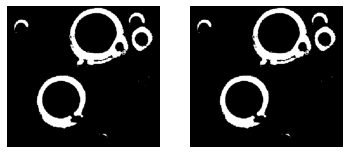

In [196]:
# 原图
im = Image.open('polymersomes.tif').convert('L')
im_ary = np.array(im, dtype='int32')
# OSTU
m,n = im_ary.shape
N = m*n   #总像素个数
L = 256
imhist = nD_histogram(im_ary.reshape((N, 1)), 1, [L], [0], [L])  # 产生图片的直方图
T = OTSU(imhist)
im_ary[im_ary <= T] = 0
im_ary[im_ary > T] = 1
new_imarry = im_ary * (L - 1)
plt.subplot(121)
plt.imshow(new_imarry, cmap='gray')
plt.axis("off")
# k-means
im = Image.open('polymersomes.tif').convert('L')
im_ary = np.array(im, dtype='int32')
im_ary = np.expand_dims(im_ary,axis=2)
random.seed(4)
new_ary = k_means(im_ary, k=2)
new_ary = np.squeeze(new_ary, axis=2)
plt.subplot(122)
plt.imshow(new_ary, cmap='gray')
plt.axis("off")

plt.savefig('./figs/fig4.png')

两者图像完全一致，与理论分析相符合。

多分类结果

iteration:1,object fucntion:47707957
iteration:2,object fucntion:46752958
iteration:3,object fucntion:46453348
iteration:4,object fucntion:46372314
iteration:5,object fucntion:46372314
iteration:1,object fucntion:40524748
iteration:2,object fucntion:26148631
iteration:3,object fucntion:21306448
iteration:4,object fucntion:19801299
iteration:5,object fucntion:16977916
iteration:6,object fucntion:14927660
iteration:7,object fucntion:13899211
iteration:8,object fucntion:13249989
iteration:9,object fucntion:13201721
iteration:10,object fucntion:13201721
iteration:1,object fucntion:13443921
iteration:2,object fucntion:9229190
iteration:3,object fucntion:7372083
iteration:4,object fucntion:6609834
iteration:5,object fucntion:5935389
iteration:6,object fucntion:5512801
iteration:7,object fucntion:5350110
iteration:8,object fucntion:5144148
iteration:9,object fucntion:4736143
iteration:10,object fucntion:4371204
iteration:11,object fucntion:4338808
iteration:12,object fucntion:4334602
iteratio

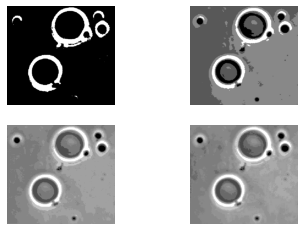

In [197]:
random.seed(4)
# im_ary = np.expand_dims(im_ary,axis=2)
new_ary1 = k_means(im_ary, k=2)
new_ary1 = np.squeeze(new_ary1, axis=2)
plt.subplot(221)
plt.imshow(new_ary1, cmap='gray')
plt.axis("off")
new_ary2 = k_means(im_ary, k=4)
new_ary2 = np.squeeze(new_ary2, axis=2)
plt.subplot(222)
plt.imshow(new_ary2, cmap='gray')
plt.axis("off")
new_ary3 = k_means(im_ary, k=8)
new_ary3 = np.squeeze(new_ary3, axis=2)
plt.subplot(223)
plt.imshow(new_ary3, cmap='gray')
plt.axis("off")
new_ary4 = k_means(im_ary, k=16)
new_ary4 = np.squeeze(new_ary4, axis=2)
plt.subplot(224)
plt.imshow(new_ary4, cmap='gray')
plt.axis("off")

plt.savefig('./figs/fig5.png')

加了噪声的图像结果

iteration:1,object fucntion:1181975856
iteration:2,object fucntion:807305120
iteration:3,object fucntion:387148482
iteration:4,object fucntion:365339299
iteration:5,object fucntion:365310122
iteration:6,object fucntion:365310122


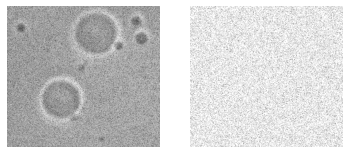

In [218]:
# 原图+椒盐噪声
random.seed(6)
im = Image.open('polymersomes.tif').convert('L')
im_ary = np.array(im, dtype='int32')
im_ary = Add_SaltAndPepper_Nosie(im_ary,p=0.1)
plt.subplot(121)
new_image = plt.imshow(im_ary,cmap='gray')
plt.axis("off")
# k-means
im_ary = np.expand_dims(im_ary,axis=2)
new_ary = k_means(im_ary, k=2)
new_ary = np.squeeze(new_ary, axis=2)
plt.subplot(122)
plt.imshow(new_ary, cmap='gray')
plt.axis("off")

plt.savefig('./figs/fig6.png')

In [221]:
print('first cluster:',new_ary.max())
print('second cluster:',new_ary.min())

first cluster: 179
second cluster: 0


In [220]:
new_ary.min()

0

iteration:1,object fucntion:1199990386
iteration:2,object fucntion:1195921298
iteration:3,object fucntion:1195194474
iteration:4,object fucntion:1195082544
iteration:5,object fucntion:1195082544


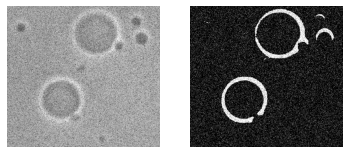

In [224]:
# 原图+椒盐噪声
random.seed(4)
im = Image.open('polymersomes.tif').convert('L')
im_ary = np.array(im, dtype='int32')
im_ary = Add_SaltAndPepper_Nosie(im_ary,p=0.1)
plt.subplot(121)
new_image = plt.imshow(im_ary,cmap='gray')
plt.axis("off")
# k-means
random.seed(4)
im_ary = np.expand_dims(im_ary,axis=2)
new_ary = k_means(im_ary, k=2)
new_ary = np.squeeze(new_ary, axis=2)
plt.subplot(122)
plt.imshow(new_ary, cmap='gray')
plt.axis("off")

plt.savefig('./figs/fig7.png')

In [225]:
print('first cluster:',new_ary.max())
print('second cluster:',new_ary.min())

first cluster: 241
second cluster: 148


In [211]:
new_ary.min()

147

探究原因

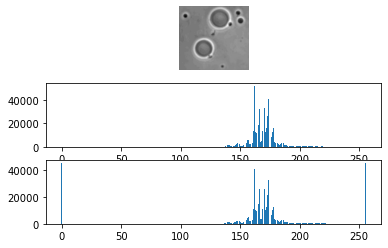

In [201]:
# 原图
im = Image.open('polymersomes.tif').convert('L')
im_ary = np.array(im, dtype='int32')
plt.subplot(311)
new_image = plt.imshow(im_ary,cmap='gray')
plt.axis("off")
plt.subplot(312)
L = 256
#绘制直方图
imhist = nD_histogram(im_ary.reshape((N, 1)), 1, [L], [0], [L])
plt.bar(np.array([n for n in range(L)]),imhist)
# 加了噪声
im_ary = Add_SaltAndPepper_Nosie(im_ary,p=0.1)
plt.subplot(313)
imhist = nD_histogram(im_ary.reshape((N, 1)), 1, [L], [0], [L])
plt.bar(np.array([n for n in range(L)]),imhist)
plt.savefig('./figs/fig8.png')

用OTSU加噪声

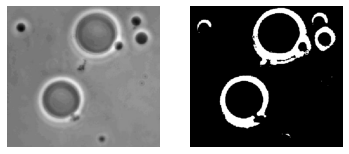

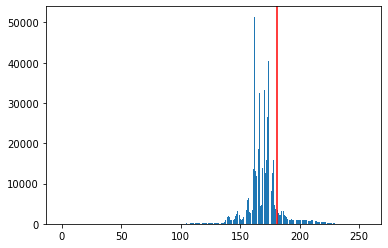

In [204]:
# 原图
im = Image.open('polymersomes.tif').convert('L')
im_ary = np.array(im, dtype='int32')
plt.subplot(121)
new_image = plt.imshow(im_ary,cmap='gray')
plt.axis("off")
# OSTU
m,n = im_ary.shape
N = m*n   #总像素个数
L = 256
imhist = nD_histogram(im_ary.reshape((N, 1)), 1, [L], [0], [L])  # 产生图片的直方图
T = OTSU(imhist)
im_ary[im_ary <= T] = 0
im_ary[im_ary > T] = 1
new_imarry = im_ary * (L - 1)
plt.subplot(122)
plt.imshow(new_imarry, cmap='gray')
plt.axis("off")
plt.show()
#绘制直方图
im = Image.open('polymersomes.tif').convert('L')
im_ary = np.array(im, dtype='int32')
plt.figure()
imhist = nD_histogram(im_ary.reshape((N, 1)), 1, [L], [0], [L])
plt.bar(np.array([n for n in range(L)]),imhist)
#绘制分割点
plt.axvline(T,color='r')
plt.savefig('./figs/fig9.png')

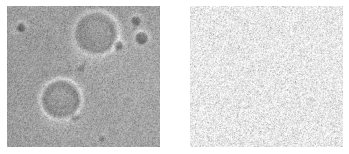

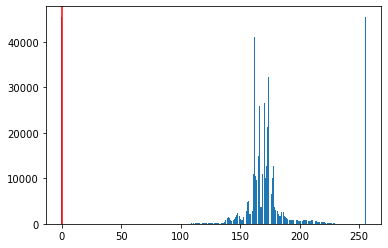

In [205]:
# 原图
random.seed(4)
im = Image.open('polymersomes.tif').convert('L')
im_ary = np.array(im, dtype='int32')
im_ary = Add_SaltAndPepper_Nosie(im_ary,p=0.1)
plt.subplot(121)
new_image = plt.imshow(im_ary,cmap='gray')
plt.axis("off")
# OSTU
m,n = im_ary.shape
N = m*n   #总像素个数
L = 256
imhist = nD_histogram(im_ary.reshape((N, 1)), 1, [L], [0], [L])  # 产生图片的直方图
T = OTSU(imhist)
im_ary[im_ary <= T] = 0
im_ary[im_ary > T] = 1
new_imarry = im_ary * (L - 1)
plt.subplot(122)
plt.imshow(new_imarry, cmap='gray')
plt.axis("off")
plt.show()
#绘制直方图
im = Image.open('polymersomes.tif').convert('L')
im_ary = np.array(im, dtype='int32')
im_ary = Add_SaltAndPepper_Nosie(im_ary,p=0.1)
plt.figure()
imhist = nD_histogram(im_ary.reshape((N, 1)), 1, [L], [0], [L])
plt.bar(np.array([n for n in range(L)]),imhist)
#绘制分割点
plt.axvline(T,color='r')
plt.savefig('./figs/fig10.png')

HW5-2

In [2]:
np.set_printoptions(threshold=np.inf)

In [3]:
def im_erode_expand(image, target=255, k=3):
    """
    实现腐蚀或膨胀
    :param image: 输入图像
    :param target: 目标物体
    :param k: 腐蚀或膨胀尺度
    :return: 返回腐蚀或膨胀后图像
    """
    m, n = image.shape
    # padding
    edge = k//2
    row = m + edge * 2
    col = n + edge * 2
    if target == 255:
        img = np.ones((row,col),dtype='int32')*255
    else:
        img = np.zeros((row,col),dtype='int32')
    img[edge:row-edge,edge:col-edge] = image
    # kernal
    if target == 255:
        kernal = np.zeros((k, k))
    else:
        kernal = np.ones((k, k))*255
    new_img = img.copy()
    # 遍历
    for i in range(m):
        for j in range(n):
            # 检查边界
            if img[edge+i,edge+j] == target:
                if img[edge+i-1,edge+j] == target and img[edge+i+1,edge+j] == target \
                        and img[edge+i,edge+j-1] == target and img[edge+i,edge+j+1] == target \
                and img[edge+i-1,edge+j-1] == target and img[edge+i-1,edge+j+1] == target \
                and img[edge+i+1,edge+j-1] == target and img[edge+i+1,edge+j+1] == target:
                    e = 1
                else:  # 边界点
                    new_img[i:i+2*edge+1, j:j+2*edge+1] = kernal
    return new_img[edge:row-edge,edge:col-edge]

In [4]:
def im_open(image, target=255, k=3):
    new_target = 0 if target == 255 else 255 
    inter_ary = im_erode_expand(image,target, k) # 先腐蚀
    new_ary = im_erode_expand(inter_ary,new_target, k) # 再膨胀
    return new_ary
def im_close(image, target=255, k=3):
    new_target = 0 if target == 255 else 255
    inter_ary = im_erode_expand(image,new_target, k) # 先膨胀
    new_ary = im_erode_expand(inter_ary,target, k) # 再腐蚀
    return new_ary

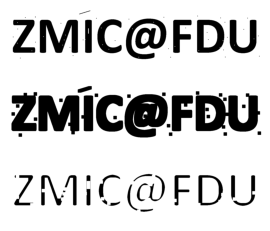

In [8]:
# 原图
im = Image.open('zmic_fdu_noise.bmp').convert('L')
im_ary = np.array(im, dtype='int32')
plt.subplot(311)
new_image = plt.imshow(im_ary,cmap='gray')
plt.axis("off")
new_ary1 = im_erode_expand(im_ary,target = 255, k=15)
plt.subplot(312)
plt.imshow(new_ary1,cmap='gray')
plt.axis("off")
new_ary2 = im_erode_expand(im_ary,target = 0, k=15)
plt.subplot(313)
plt.imshow(new_ary2,cmap='gray')
plt.axis("off")
plt.savefig('./figs/fig13')

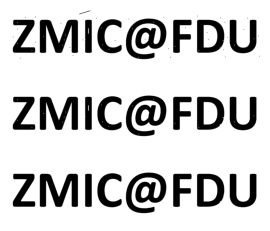

In [10]:
im = Image.open('zmic_fdu_noise.bmp').convert('L')
im_ary = np.array(im, dtype='int32')
plt.subplot(311)
new_image = plt.imshow(im_ary,cmap='gray')
plt.axis("off")
new_ary = im_open(im_ary,target = 0, k=3)
plt.subplot(312)
plt.imshow(new_ary,cmap='gray')
plt.axis("off")
f_ary = im_close(new_ary,target = 0, k=3)
plt.subplot(313)
plt.imshow(f_ary,cmap='gray')
plt.axis("off")
plt.savefig('./figs/fig14')